#  Task 2: MOVIE RATE PREDICTION

## Import Libraries

In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## Load and Explore Data

In [151]:
movie = pd.read_csv('E:\\codsoft\\IMDb Movies India.csv', encoding='ISO-8859-1')


In [152]:
movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [153]:
movie.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [154]:
movie.shape

(15509, 10)

In [155]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [156]:
movie.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [157]:
movie.describe(include='all')


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [158]:
missing_values = movie.isna().sum()
percentages = (missing_values / len(movie)) * 100
result_movie= pd.DataFrame({
    'no of missing values': missing_values.values,
    'percentage': percentages.apply(lambda x: f'{x:.2f}%')  # Format percentages with 2 decimal places and percentage sign
}, index=movie.columns)
result_movie

,no of missing values,percentage
Name,0,0.00%
Year,528,3.40%
Duration,8269,53.32%
Genre,1877,12.10%
Rating,7590,48.94%
Votes,7589,48.93%
Director,525,3.39%
Actor 1,1617,10.43%
Actor 2,2384,15.37%
Actor 3,3144,20.27%


In [159]:
# Rating will be the target variable for prediction so im dropping its null values
movie.dropna(subset=['Rating'],inplace=True)


In [160]:
missing_values = movie.isna().sum()
percentages = (missing_values / len(movie)) * 100

result_movie = pd.DataFrame({
    'no of missing values': missing_values.values,
    'percentage': percentages.apply(lambda x: f'{x:.2f}%')  # Format percentages with 2 decimal places and percentage sign
}, index=movie.columns)

result_movie

,no of missing values,percentage
Name,0,0.00%
Year,0,0.00%
Duration,2068,26.11%
Genre,102,1.29%
Rating,0,0.00%
Votes,0,0.00%
Director,5,0.06%
Actor 1,125,1.58%
Actor 2,200,2.53%
Actor 3,292,3.69%


In [161]:
movie['Votes']= movie['Votes'].str.replace(',','').astype(int)
movie['Year']= movie['Year'].str.strip('()').astype(int)
movie['Duration']=movie['Duration'].str.strip(' min')

In [162]:
movie['Duration_copy']=movie['Duration']
mask = movie['Duration'].isnull()
random_values = np.random.randint(90, 181, size=mask.sum())  # Generate random numbers
movie['Duration'][mask] = random_values
org_duration = movie.loc[~movie['Duration_copy'].isnull(), 'Duration_copy'].astype(int)
movie['Duration'] = movie['Duration'].astype(int)    


C:\Users\WELCOME.DESKTOP-HERGUNK\AppData\Local\Temp\ipykernel_5620\2798351088.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['Duration'][mask] = random_values


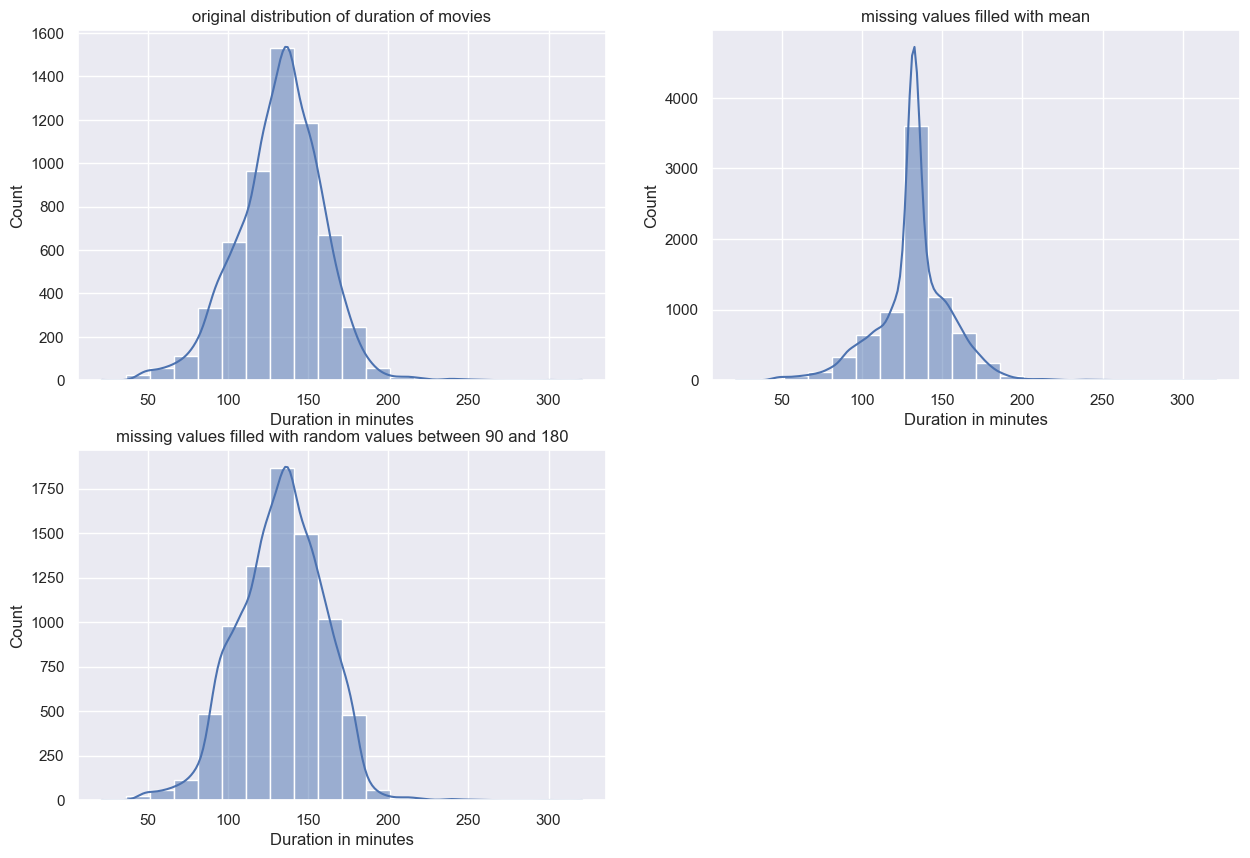

In [163]:
sns.set_style('darkgrid')
fig,ax = plt.subplots(2,2,figsize=(15,10))
sns.histplot(data=org_duration,bins=20,kde=True,ax=ax[0][0])
sns.histplot(data=movie,x=movie['Duration_copy'].fillna(org_duration.mean()).astype(int),bins=20,kde=True,ax=ax[0][1])
sns.histplot(data=movie,x=movie['Duration'],bins=20,kde=True,ax=ax[1][0])
ax[0][0].set_xlabel('Duration in minutes')
ax[0][1].set_xlabel('Duration in minutes')
ax[1][0].set_xlabel('Duration in minutes')
ax[0][0].set_title('original distribution of duration of movies')
ax[0][1].set_title('missing values filled with mean')
ax[1][0].set_title('missing values filled with random values between 90 and 180')
fig.delaxes(ax[1][1])
plt.show()

In [164]:
movie.drop(columns=['Duration_copy'],inplace=True)


In [165]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7919 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7919 non-null   object 
 1   Year      7919 non-null   int32  
 2   Duration  7919 non-null   int32  
 3   Genre     7817 non-null   object 
 4   Rating    7919 non-null   float64
 5   Votes     7919 non-null   int32  
 6   Director  7914 non-null   object 
 7   Actor 1   7794 non-null   object 
 8   Actor 2   7719 non-null   object 
 9   Actor 3   7627 non-null   object 
dtypes: float64(1), int32(3), object(6)
memory usage: 845.8+ KB


In [166]:
top_10_movies = movie.loc[movie['Rating'].sort_values(ascending=False)[:10].index]
top_10_movies

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,2020,94,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,2021,79,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2563,Breed,2020,174,Drama,9.6,48,Bobby Kumar,Bobby Kumar,Ashfaq,Fasih Choudhry
11704,Ram-Path,2017,161,Documentary,9.4,5,Ashish Dubey,Ishan Jacob,NaN,NaN
14222,The Reluctant Crime,2020,113,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
6852,June,2021,93,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
5077,Gho Gho Rani,2019,105,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
1314,Ashok Vatika,2018,97,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
5125,God of gods,2019,90,Documentary,9.3,46,Venkatesh Bk,Tejaswini Manogna,Triyug Mantri,Raj Singh Verma
12673,Secrets of Sinauli,2021,56,"Documentary, History",9.3,1373,Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit


In [167]:
movie.groupby('Year').apply(pd.DataFrame.nlargest, n=1, columns=['Rating'])


,,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
Year,,,,,,,,,,,
1917,8146,Lanka Dahan,1917,91,"Adventure, Drama, Fantasy",6.7,22,Dhundiraj Govind Phalke,Anna Salunke,Ganpat G. Shinde,D.D. Dabke
1931,7203,Kalidas,1931,133,"Drama, History, Musical",6.2,12,H.M. Reddy,T.P. Rajalakshmi,P.G. Venkatesan,L.V. Prasad
1932,2183,Bharati Mata,1932,149,NaN,6.1,12,Pesi Karani,Hadi,Jamshedji,Jillo
1933,851,Alif Laila,1933,161,Fantasy,7.2,37,Balwant Bhatt,Shanti Dave,Bashir Qawal,Zohra
1934,9053,Mazdoor,1934,155,Drama,8.5,6,Mohan Dayaram Bhavnani,Bibbo,S.B. Nayampalli,Paidi Jairaj
...,...,...,...,...,...,...,...,...,...,...,...
2017,11704,Ram-Path,2017,161,Documentary,9.4,5,Ashish Dubey,Ishan Jacob,NaN,NaN
2018,1314,Ashok Vatika,2018,97,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
2019,5077,Gho Gho Rani,2019,105,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar


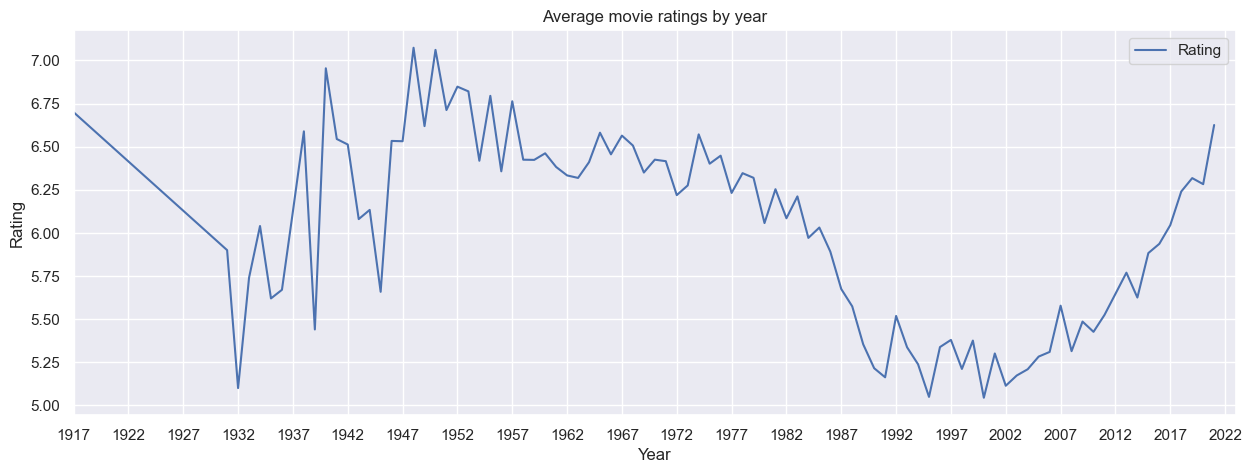

In [168]:
sns.set_style('darkgrid')
movie.groupby('Year')[['Rating']].mean().plot(figsize=(15,5))
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Average movie ratings by year')
plt.xticks(np.arange(1917,2023,5))
plt.xlim(1917,2023)
plt.show()

In [169]:
movie.fillna(0, inplace=True)  # Replace missing values with 0


In [170]:
movie.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [171]:
movie = pd.get_dummies(movie, columns=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], drop_first=True)


In [172]:
movie.columns.all()

'Actor 3_Zulfi Sayed'

In [173]:
X = movie[['Year', 'Duration', 'Votes', 'Genre_Action', 'Genre_Drama',  'Votes', 'Genre_Action',
       'Genre_Action, Adventure', 'Genre_Action, Adventure, Biography',
       'Genre_Action, Adventure, Comedy', 'Genre_Action, Adventure, Crime',
       'Actor 3_Zarine Ali', 'Actor 3_Zayed Khan', 'Actor 3_Zebunissa',
       'Actor 3_Zeenat Aman', 'Actor 3_Zeeshan Khan', 'Actor 3_Zeishan Quadri',
       'Actor 3_Zenobia Shroff', 'Actor 3_Zohra', 'Actor 3_Zoya Hussain',
       'Actor 3_Zulfi Sayed']]  # Replace with your features
y = movie['Rating']

In [174]:
X

,Year,Duration,Votes,Genre_Action,Genre_Drama,Votes,Genre_Action,"Genre_Action, Adventure","Genre_Action, Adventure, Biography","Genre_Action, Adventure, Comedy",...,Actor 3_Zarine Ali,Actor 3_Zayed Khan,Actor 3_Zebunissa,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zohra,Actor 3_Zoya Hussain,Actor 3_Zulfi Sayed
1,2019,109,8,0,1,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2019,110,35,0,0,35,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1997,147,827,0,0,827,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2005,142,1086,0,0,1086,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2012,82,326,0,0,326,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15501,1992,99,135,0,0,135,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15503,1989,125,44,0,0,44,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15504,1988,123,11,1,0,11,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15505,1999,129,655,0,0,655,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
y

1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15501    5.3
15503    5.8
15504    4.6
15505    4.5
15508    6.2
Name: Rating, Length: 7919, dtype: float64

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [178]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [179]:
y_pred = model.predict(X_test)

In [180]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [181]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 1.7883159105673152
R-squared: 0.0902530040321099


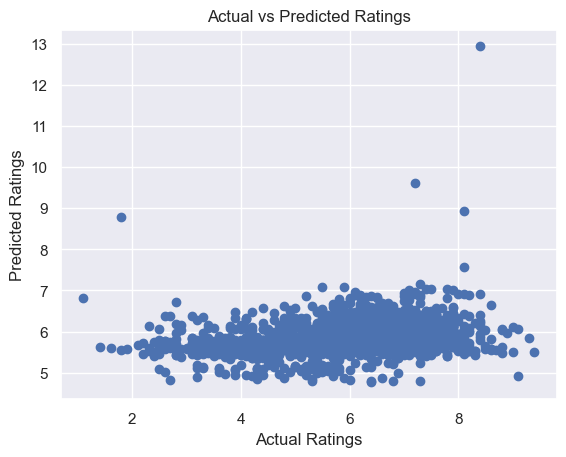

In [182]:
# Visualize actual vs predicted ratings
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()

In [183]:
from sklearn.ensemble import RandomForestRegressor

In [184]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [186]:
y_pred = model.predict(X_test)

In [187]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')



Mean Squared Error: 1.5574829225280584
R-squared: 0.20768170675633202


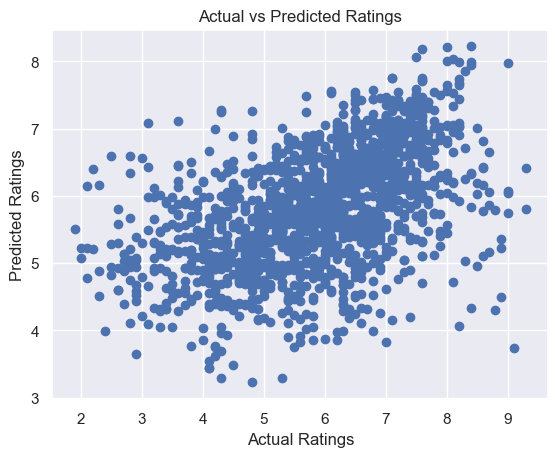

In [147]:
# Visualize actual vs predicted ratings
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()